In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [109]:
import seaborn as sns

/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [15]:
import os

In [3]:
import PIL.Image as pilimg

In [80]:
import tensorflow
import keras

In [113]:
from keras.applications import xception, vgg16, inception_v3, resnet50, mobilenet
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm

In [118]:
from keras.applications.imagenet_utils import decode_predictions

In [52]:
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid

Using TensorFlow backend.
/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufu

In [6]:
im = pilimg.open('../../data/plant_seed/train/Black-grass/0ace21089.png')

In [8]:
pix = np.array(im)

In [22]:
h,w = pix.shape[:2]

In [23]:
h

1899

In [16]:
data_dir = '../../data/plant_seed/plant-seeding-classification/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir,'test')
sample_submission = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))

In [17]:
CATEGORIES = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

In [56]:
SEED = 42

In [18]:
for category in CATEGORIES:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

Black-grass 263 images
Charlock 390 images
Cleavers 287 images
Common Chickweed 611 images
Common wheat 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Maize 221 images
Scentless Mayweed 516 images
Shepherds Purse 231 images
Small-flowered Cranesbill 496 images
Sugar beet 385 images


In [24]:
train =[]
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        file_name = 'train/{}/{}'.format(category, file)
        file_location = os.path.join(data_dir, file_name)
        im = pilimg.open(file_location)
        pix = np.array(im)
        height, width = pix.shape[:2]
        
        train.append(['train/{}/{}'.format(category, file), category_id, category, height, width])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category', 'height', 'width'])

train.shape

(4750, 5)

In [25]:
train.head()

,file,category_id,category,height,width
0,train/Black-grass/e47987eab.png,0,Black-grass,1320,1321
1,train/Black-grass/31958c132.png,0,Black-grass,400,400
2,train/Black-grass/f423f84da.png,0,Black-grass,749,749
3,train/Black-grass/cc90c662f.png,0,Black-grass,128,128
4,train/Black-grass/9052e3e7f.png,0,Black-grass,158,158


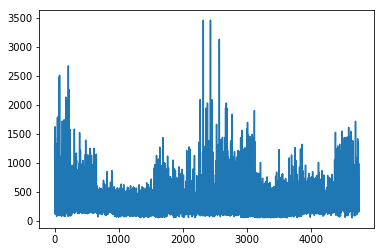

In [26]:
train.height.plot()

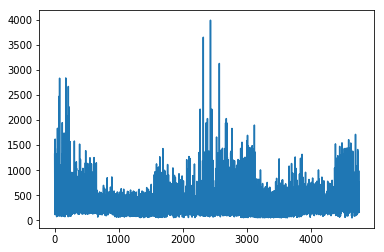

In [27]:
train.width.plot()

# Sample 추출

In [35]:
train[(train['height'] >=300) & (train['height']<500)  ]['category'].value_counts()

Charlock                     141
Small-flowered Cranesbill    137
Common Chickweed             116
Loose Silky-bent             114
Cleavers                     110
Fat Hen                      109
Sugar beet                    90
Shepherds Purse               50
Scentless Mayweed             47
Black-grass                   46
Maize                         36
Common wheat                  33
Name: category, dtype: int64

In [36]:
train_sample = train[(train['height'] >=300) & (train['height']<500)  ]

In [37]:
SAMPLE_PER_CATEGORY = train[(train['height'] >=300) & (train['height']<500)  ]['category'].value_counts().min()

In [45]:
train_sample = pd.concat([train_sample[train_sample['category']==c][:SAMPLE_PER_CATEGORY] for c in CATEGORIES])

In [46]:
train_sample['category'].value_counts()

Small-flowered Cranesbill    33
Fat Hen                      33
Charlock                     33
Cleavers                     33
Loose Silky-bent             33
Common wheat                 33
Sugar beet                   33
Black-grass                  33
Common Chickweed             33
Scentless Mayweed            33
Maize                        33
Shepherds Purse              33
Name: category, dtype: int64

In [47]:
train_sample.head()

,file,category_id,category,height,width
9,train/Black-grass/fef14b865.png,0,Black-grass,471,471
11,train/Black-grass/5e65dbdd7.png,0,Black-grass,388,388
15,train/Black-grass/dca86daba.png,0,Black-grass,435,435
16,train/Black-grass/77629b9e3.png,0,Black-grass,368,352
22,train/Black-grass/6e027ec7d.png,0,Black-grass,352,352


In [48]:
train_sample = train_sample.sample(frac=1)
train_sample.head()

,file,category_id,category,height,width
388,train/Cleavers/420f3654f.png,2,Cleavers,305,305
383,train/Shepherds Purse/9308e84bc.png,9,Shepherds Purse,411,411
5,train/Common wheat/a25f5ccb5.png,4,Common wheat,431,431
232,train/Common Chickweed/ea3e13899.png,3,Common Chickweed,400,400
31,train/Fat Hen/b0398be3d.png,5,Fat Hen,361,361


In [49]:
train_sample.index = np.arange(len(train_sample))
train_sample.head()

,file,category_id,category,height,width
0,train/Cleavers/420f3654f.png,2,Cleavers,305,305
1,train/Shepherds Purse/9308e84bc.png,9,Shepherds Purse,411,411
2,train/Common wheat/a25f5ccb5.png,4,Common wheat,431,431
3,train/Common Chickweed/ea3e13899.png,3,Common Chickweed,400,400
4,train/Fat Hen/b0398be3d.png,5,Fat Hen,361,361


In [50]:
test =[]

for file in os.listdir(test_dir):
    file_name = 'test/{}'.format(file)
    file_location = os.path.join(data_dir, file_name)
    im = pilimg.open(file_location)
    pix = np.array(im)
    height, width = pix.shape[:2]

    test.append(['test/{}'.format(file), file,height, width])
test = pd.DataFrame(test, columns=['filepath','file', 'height', 'width'])

test.shape


(794, 4)

In [54]:
test.head()

,filepath,file,height,width
0,test/17d5e5ac4.png,17d5e5ac4.png,225,225
1,test/948cdb277.png,948cdb277.png,201,201
2,test/e1809cef2.png,e1809cef2.png,330,330
3,test/0c45ace27.png,0c45ace27.png,260,260
4,test/59e1cea8d.png,59e1cea8d.png,240,240


In [53]:
def read_img(filepath, size):
    img = image.load_img(os.path.join(data_dir, filepath), target_size=size)
    img = image.img_to_array(img)
    return img

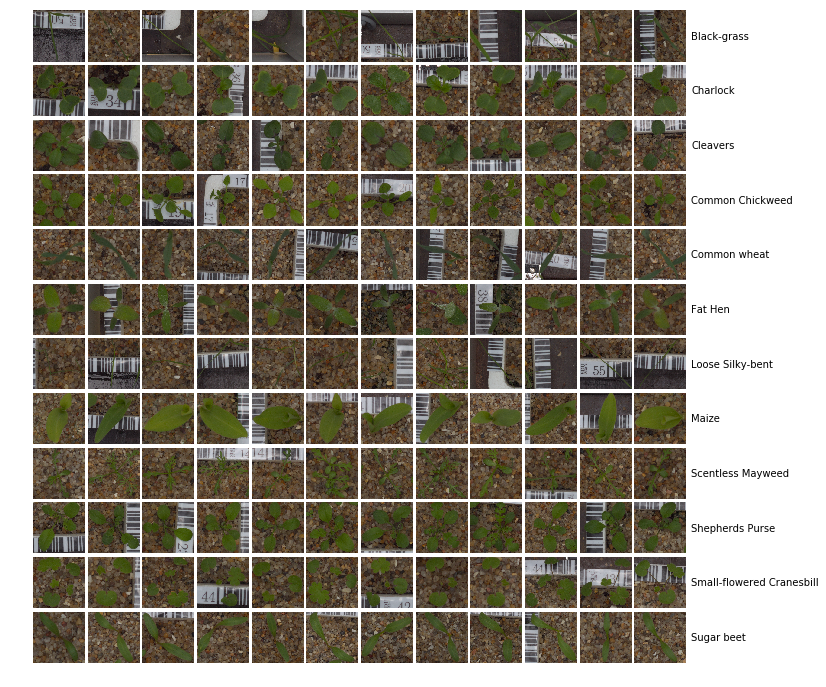

In [60]:
fig = plt.figure(1, figsize=(12,12))
grid = ImageGrid(fig, 111, nrows_ncols=(12,12), axes_pad=0.05)
i=0
for category_id, category in enumerate(CATEGORIES):
    for filepath in train_sample[train_sample['category'] == category]['file'].values[:12]:
        ax = grid[i]
        img = read_img(filepath, (224,224))
        ax.imshow(img/255.)
        ax.axis('off')
        if i % 12 == 11:
            ax.text(250, 112, filepath.split('/')[1], verticalalignment = 'center')
        i += 1
plt.show()

# Validation split

In [61]:
np.random.seed(seed=SEED)
rnd = np.random.random(len(train_sample))

In [63]:
train_idx = rnd < 0.8
valid_idx = rnd >=0.8

In [90]:
Ytr = train_sample.loc[train_idx,'category_id'].values
Yv = train_sample.loc[valid_idx,'category_id'].values

In [73]:
train_idx[train_idx==True].shape, valid_idx[valid_idx==True].shape

((316,), (80,))

# Extract Xception bottleneck features

In [85]:
INPUT_SIZE = 299
POOLING = 'avg'

In [86]:
x_train = np.zeros((len(train_sample), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
for i, file in tqdm(enumerate(train_sample['file'])):
    img = read_img(file, (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis = 0))
    x_train[i] = x

print('Train Images shape: {} size: {: ,}'.format(x_train.shape, x_train.size))

396it [00:02, 147.57it/s]

Train Images shape: (396, 299, 299, 3) size:  106,208,388


In [91]:
Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, Ytr.shape, Yv.shape))

((316, 299, 299, 3), (80, 299, 299, 3), (316,), (80,))


In [92]:
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)

83689472/83683744 [==============================] - 19s 0us/step


In [94]:
train_x_bf = xception_bottleneck.predict(Xtr, batch_size=16, verbose=1)
valid_x_bf = xception_bottleneck.predict(Xv, batch_size=16, verbose = 1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size))
print('Xception valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf.shape, valid_x_bf.size))

80/80 [==============================] - 0s 5ms/step
Xception train bottleneck features shape: (316, 2048) size: 647,168
Xception valid bottleneck features shape: (80, 2048) size: 163,840


In [99]:
Xtr.shape

(316, 299, 299, 3)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [103]:
logreg = LogisticRegression(multi_class='multinomial', solver ='lbfgs', random_state=SEED)
logreg.fit(train_x_bf, Ytr)
valid_probs = logreg.predict_proba(valid_x_bf)
valid_preds = logreg.predict(valid_x_bf)

In [131]:
valid_probs.argmax(axis =1)

array([ 3,  1,  1,  0,  8,  7, 10,  7,  5,  2,  5, 10,  7,  3,  7,  8,  9,
        0,  6,  9, 10,  5,  6,  6, 10,  9,  4,  8,  6,  1, 11,  8,  6,  5,
        2,  4, 11,  8,  4,  8,  4,  1, 11,  0,  8,  0,  3,  3,  5,  6,  9,
        4,  3,  7,  6,  1,  7,  1,  3,  3,  7,  5,  5,  2,  9,  6, 10,  5,
       10,  4,  8,  4,  3,  5,  7,  4,  2,  1,  3,  7])

In [132]:
valid_preds

array([ 3,  1,  1,  0,  8,  7, 10,  7,  5,  2,  5, 10,  7,  3,  7,  8,  9,
        0,  6,  9, 10,  5,  6,  6, 10,  9,  4,  8,  6,  1, 11,  8,  6,  5,
        2,  4, 11,  8,  4,  8,  4,  1, 11,  0,  8,  0,  3,  3,  5,  6,  9,
        4,  3,  7,  6,  1,  7,  1,  3,  3,  7,  5,  5,  2,  9,  6, 10,  5,
       10,  4,  8,  4,  3,  5,  7,  4,  2,  1,  3,  7])

In [105]:
print('Validataion Xception Accuracy {}'.format(accuracy_score(Yv, valid_preds)))

Validataion Xception Accuracy 0.8125


# Confusion matrix

In [106]:
cnf_matrix = confusion_matrix(Yv, valid_preds)

In [108]:
abbreviation = ['BG', 'Ch', 'Cl', 'CC', 'CW', 'FH', 'LSB', 'M', 'SM', 'SP', 'SFC', 'SB']
pd.DataFrame({'class': CATEGORIES, 'abbreviation': abbreviation})

,class,abbreviation
0,Black-grass,BG
1,Charlock,Ch
2,Cleavers,Cl
3,Common Chickweed,CC
4,Common wheat,CW
5,Fat Hen,FH
6,Loose Silky-bent,LSB
7,Maize,M
8,Scentless Mayweed,SM
9,Shepherds Purse,SP


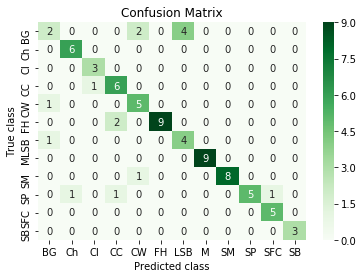

In [112]:
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax = ax ,cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(abbreviation)
ax.set_yticklabels(abbreviation)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
fig.savefig('Confusion matrix.png', dpi = 300)
plt.show()

# Other pre-trained model

In [146]:
# xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False, pooling=POOLING)
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling=POOLING)
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False, pooling=POOLING)
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False, pooling=POOLING)

/home/jeongchanwoo/miniconda3/envs/tensorflow/lib/python3.6/site-packages/keras_applications/mobilenet.py:206: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 26s 2us/step


In [176]:
INPUT_SIZE = 224
POOLING = 'avg'

In [192]:
def image_trasform(train_sample, INPUT_SIZE, pre_model):
    x_train = np.zeros((len(train_sample), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
    for i, file in tqdm(enumerate(train_sample['file'])):
        img = read_img(file, (INPUT_SIZE, INPUT_SIZE))
#         print(img)
        x = pre_model.preprocess_input(np.expand_dims(img.copy(), axis = 0))
        x_train[i] = x

    print('Train Images shape: {} size: {: ,}'.format(x_train.shape, x_train.size))
    return x_train

In [193]:
def predict_proba(x_t, x_v, pre_model ):
    train_x_bf = pre_model.predict(x_t, batch_size=16, verbose=1)
    valid_x_bf = pre_model.predict(x_v, batch_size=16, verbose = 1)
    print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size))
    print('Xception valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf.shape, valid_x_bf.size))
    
    return train_x_bf, valid_x_bf

In [194]:
# def evaluate(x_v_proba, y_v):
#     x_v_label = decode_predictions(x_v_proba)
# #     x_v_label = x_v_proba.argmax(axis =1)
# #     print('Validataion Xception Accuracy {}'.format(accuracy_score(y_v, x_v_label)))
#     return x_v_label

In [195]:
def evaluate(x_v_pro, y_v):
    print('Validataion Xception Accuracy {}'.format(accuracy_score(Yv, valid_preds)))
    return accuracy_score(Yv, valid_preds)

In [196]:
def pre_trained(pre_weight, pre_model):
    x_train = image_trasform(train_sample, INPUT_SIZE, pre_weight)
    Xtr = x_train[train_idx]
    Xv = x_train[valid_idx]
    print((Xtr.shape, Xv.shape, Ytr.shape, Yv.shape))
    train_proba, valid_proba = predict_proba(Xtr, Xv, pre_model)
    return (train_proba, valid_proba)
    

In [197]:
def label_classification(train_proba, Ytr, valid_proba):
    logreg = LogisticRegression(multi_class='multinomial', solver ='lbfgs', random_state=SEED)
    logreg.fit(train_proba, Ytr)
    valid_probs = logreg.predict_proba(valid_proba)
    valid_preds = logreg.predict(valid_proba)

    return evaluate(valid_preds, Yv)

In [198]:
vgg_16 = pre_trained(vgg16, vgg_model)
# inception_v3 = pre_trained(inception_v3, inception_model)
resnet_50 = pre_trained(resnet50, resnet_model)
# mobilenet = pre_trained(mobilenet, mobilenet_model)

396it [00:02, 149.49it/s]


Train Images shape: (396, 224, 224, 3) size:  59,609,088
((316, 224, 224, 3), (80, 224, 224, 3), (316,), (80,))
80/80 [==============================] - 0s 3ms/step
Xception train bottleneck features shape: (316, 512) size: 161,792
Xception valid bottleneck features shape: (80, 512) size: 40,960


396it [00:02, 148.75it/s]


Train Images shape: (396, 224, 224, 3) size:  59,609,088
((316, 224, 224, 3), (80, 224, 224, 3), (316,), (80,))
80/80 [==============================] - 0s 3ms/step
Xception train bottleneck features shape: (316, 2048) size: 647,168
Xception valid bottleneck features shape: (80, 2048) size: 163,840


In [199]:
vgg_score = label_classification(vgg_16[0], Ytr, vgg_16[1])
# inception_v3_score = label_classification(inception_v3[0], Ytr, inception_v3[1])
resnet_50_score = label_classification(resnet_50[0], Ytr, resnet_50[1])
# mobilenet_score = label_classification(mobilenet[0], Ytr, mobilenet[1])

Validataion Xception Accuracy 0.7875
Validataion Xception Accuracy 0.7875
